<a href="https://colab.research.google.com/github/Alexiserges/Principal-Component-Analysis-PCA-A-/blob/main/Principal_Component_Analysis_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal component analysis (PCA) is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. 
Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data. Many studies use the first two principal components in order to plot the data in two dimensions and to visually identify clusters of closely related data points. Principal component analysis has applications in many fields such as population genetics, microbiome studies, and atmospheric science

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

In [50]:
df = pd.read_csv('Dataset.csv')

In [51]:
df.head()

,COUNTY,DATE,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
0,Anderson,10/12/2022,26624,2,16211,1,10413.0,1.0,17646.0,1.0,94584.0,7.0,112230.0,8.0,0.0,381.0,0.0,385.0,381.0,0.0
1,Bedford,10/12/2022,17298,5,12508,5,4790.0,0.0,13873.0,5.0,53100.0,11.0,66973.0,16.0,0.0,246.0,0.0,335.0,246.0,0.0
2,Benton,10/12/2022,5424,0,3154,0,2270.0,0.0,3367.0,0.0,15084.0,6.0,18451.0,6.0,0.0,101.0,0.0,129.0,101.0,0.0
3,Bledsoe,10/12/2022,5220,0,3827,0,1393.0,0.0,4061.0,0.0,24075.0,1.0,28136.0,1.0,0.0,63.0,0.0,100.0,63.0,0.0
4,Blount,10/12/2022,46919,5,37075,3,9844.0,2.0,39618.0,3.0,138816.0,25.0,178434.0,28.0,0.0,502.0,0.0,963.0,501.0,0.0


In [52]:
df.isnull().sum()

COUNTY                 0
DATE                   0
TOTAL_CASES            0
NEW_CASES              0
TOTAL_CONFIRMED        0
NEW_CONFIRMED          0
TOTAL_PROBABLE         1
NEW_PROBABLE           1
POS_TESTS              1
NEW_POS_TESTS          1
NEG_TESTS              1
NEW_NEG_TESTS          1
TOTAL_TESTS            1
NEW_TESTS              1
NEW_DEATHS             1
TOTAL_DEATHS           1
NEW_HOSPITALIZED       1
TOTAL_HOSPITALIZED     1
TOTAL_DEATHS_BY_DOD    1
NEW_DEATHS_BY_DOD      1
dtype: int64

In [53]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [54]:
for feature in ['TOTAL_PROBABLE','NEW_PROBABLE','POS_TESTS','NEW_POS_TESTS','NEG_TESTS','NEW_NEG_TESTS','TOTAL_TESTS','NEW_TESTS',
'NEW_DEATHS', 'TOTAL_DEATHS' , 'NEW_HOSPITALIZED', 'TOTAL_HOSPITALIZED', 'TOTAL_DEATHS_BY_DOD', 'NEW_DEATHS_BY_DOD']:
    impute_nan(df,feature)

In [55]:
df.isnull().mean()

COUNTY                 0.0
DATE                   0.0
TOTAL_CASES            0.0
NEW_CASES              0.0
TOTAL_CONFIRMED        0.0
NEW_CONFIRMED          0.0
TOTAL_PROBABLE         0.0
NEW_PROBABLE           0.0
POS_TESTS              0.0
NEW_POS_TESTS          0.0
NEG_TESTS              0.0
NEW_NEG_TESTS          0.0
TOTAL_TESTS            0.0
NEW_TESTS              0.0
NEW_DEATHS             0.0
TOTAL_DEATHS           0.0
NEW_HOSPITALIZED       0.0
TOTAL_HOSPITALIZED     0.0
TOTAL_DEATHS_BY_DOD    0.0
NEW_DEATHS_BY_DOD      0.0
dtype: float64

In [56]:
df.keys()

Index(['COUNTY', 'DATE', 'TOTAL_CASES', 'NEW_CASES', 'TOTAL_CONFIRMED',
       'NEW_CONFIRMED', 'TOTAL_PROBABLE', 'NEW_PROBABLE', 'POS_TESTS',
       'NEW_POS_TESTS', 'NEG_TESTS', 'NEW_NEG_TESTS', 'TOTAL_TESTS',
       'NEW_TESTS', 'NEW_DEATHS', 'TOTAL_DEATHS', 'NEW_HOSPITALIZED',
       'TOTAL_HOSPITALIZED', 'TOTAL_DEATHS_BY_DOD', 'NEW_DEATHS_BY_DOD'],
      dtype='object')

In [57]:
print(df.describe)

<bound method NDFrame.describe of          COUNTY        DATE  TOTAL_CASES  NEW_CASES  TOTAL_CONFIRMED  \
0      Anderson  10/12/2022        26624          2            16211   
1       Bedford  10/12/2022        17298          5            12508   
2        Benton  10/12/2022         5424          0             3154   
3       Bledsoe  10/12/2022         5220          0             3827   
4        Blount  10/12/2022        46919          5            37075   
...         ...         ...          ...        ...              ...   
75205    Grundy  26/10/2020          596          6              553   
75206   Hamblen  26/10/2020         2468         19             2244   
75207  Hamilton  26/10/2020        11861         72            11330   
75208   Hancock  26/10/2020          129          0              117   
75209  Hardeman  26/10/2020         1887          7             1761   

       NEW_CONFIRMED  TOTAL_PROBABLE  NEW_PROBABLE  POS_TESTS  NEW_POS_TESTS  \
0                  1 

In [58]:
numerical_lst=['int16','int32', 'int64', 'float16','float32','float64' ]
numerical_cols= list(df.select_dtypes(include=numerical_lst).columns)

In [59]:
numerical_cols

['TOTAL_CASES',
 'NEW_CASES',
 'TOTAL_CONFIRMED',
 'NEW_CONFIRMED',
 'TOTAL_PROBABLE',
 'NEW_PROBABLE',
 'POS_TESTS',
 'NEW_POS_TESTS',
 'NEG_TESTS',
 'NEW_NEG_TESTS',
 'TOTAL_TESTS',
 'NEW_TESTS',
 'NEW_DEATHS',
 'TOTAL_DEATHS',
 'NEW_HOSPITALIZED',
 'TOTAL_HOSPITALIZED',
 'TOTAL_DEATHS_BY_DOD',
 'NEW_DEATHS_BY_DOD']

In [60]:
df=df[numerical_cols]
df.head()

,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEW_POS_TESTS,NEG_TESTS,NEW_NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_HOSPITALIZED,TOTAL_HOSPITALIZED,TOTAL_DEATHS_BY_DOD,NEW_DEATHS_BY_DOD
0,26624,2,16211,1,10413.0,1.0,17646.0,1.0,94584.0,7.0,112230.0,8.0,0.0,381.0,0.0,385.0,381.0,0.0
1,17298,5,12508,5,4790.0,0.0,13873.0,5.0,53100.0,11.0,66973.0,16.0,0.0,246.0,0.0,335.0,246.0,0.0
2,5424,0,3154,0,2270.0,0.0,3367.0,0.0,15084.0,6.0,18451.0,6.0,0.0,101.0,0.0,129.0,101.0,0.0
3,5220,0,3827,0,1393.0,0.0,4061.0,0.0,24075.0,1.0,28136.0,1.0,0.0,63.0,0.0,100.0,63.0,0.0
4,46919,5,37075,3,9844.0,2.0,39618.0,3.0,138816.0,25.0,178434.0,28.0,0.0,502.0,0.0,963.0,501.0,0.0


In [61]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
scaler.fit(df)

StandardScaler()

In [63]:
scaled_data=scaler.transform(df)


In [64]:
scaled_data

array([[ 0.41695754, -0.30164951,  0.19493107, ..., -0.01647952,
         0.54007282, -0.35024838],
       [ 0.0885282 , -0.2678103 ,  0.04323649, ..., -0.07495989,
         0.13922571, -0.35024838],
       [-0.32963285, -0.32420899, -0.33995312, ..., -0.31589901,
        -0.29131378, -0.35024838],
       ...,
       [-0.10294406,  0.4879321 , -0.00502066, ...,  0.18703216,
        -0.25271368,  0.70402923],
       [-0.51610437, -0.32420899, -0.46436479, ..., -0.45157346,
        -0.58229909, -0.35024838],
       [-0.45419371, -0.24525083, -0.39701781, ..., -0.35800487,
        -0.43680643, -0.35024838]])

In [65]:
##  Applying PCA Algorithms
from sklearn.decomposition import PCA

In [77]:
pca=PCA(n_components=2)

In [78]:
data_pca=pca.fit_transform(scaled_data)

In [79]:
data_pca

array([[ 0.39265648, -1.45228233],
       [-0.36063425, -0.76135066],
       [-1.26600296, -0.19444497],
       ...,
       [ 0.99271216,  1.68326681],
       [-1.73394667,  0.16389939],
       [-1.48760067,  0.05419729]])

In [80]:
pca.explained_variance_

array([10.39139145,  3.27788766])

Text(0, 0.5, 'Second Principal Component')

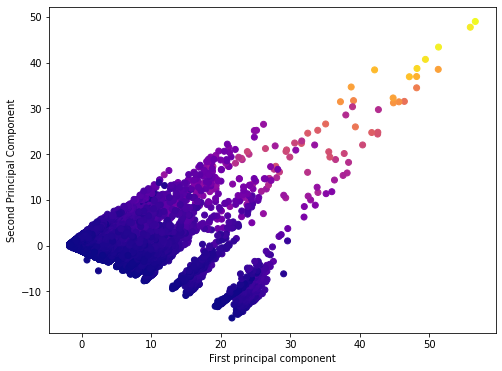

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0],data_pca[:,1],c=df['NEW_CASES'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')